In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
pd.set_option('display.max_columns', 20)

# Spotify Dataset EDA

In [206]:
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [181]:
df.head()

uris                         names        artist_names  \
0  5u5MpBnvJejW9dHPrfWEXZ                     Superstar             Jamelia   
1  5DqrMSaG6KXa9PWlnnKJyb                        Dreams           GABRIELLE   
2  2nGFzvICaeEWjIrBrL2RAx           Put Your Records On  Corinne Bailey Rae   
3  1Xsxp1SEOxuMzjrFZhtw8u                    Next To Me         Emeli Sandé   
4  3stnrhzN0lzZFskbaZ5sEw  Scandalous - U.S. Radio Edit            Mis-Teeq   

              artist_uris  artist_pop  \
0  3f5W9NEwkc1SAIPFuumcaf          51   
1  7rftfGIYEeZ79sLb58ZBDi          56   
2  29WzbAQtDnBJF09es0uddn          63   
3  7sfgqEdoeBTjd8lQsPT3Cy          61   
4  6csA2rxNLkQJXeEa7lyGXn          44   

                                      artist_genres  \
0                        ['europop', 'talent show']   
1                  ['british soul', 'new wave pop']   
2  ['british soul', 'neo soul', 'pop soul', 'soul']   
3                  ['r&b', 'talent show', 'uk pop']   
4                       ['girl group', 'uk garage']   

                                          albums  track_pop  danceability  \
0                                      Thank You         70         0.801   
1  Dreams Can Come True - Greatest Hits Volume 1         46         0.744   
2                             Corinne Bailey Rae         80         0.739   
3                          Our Version Of Events         55         0.674   
4                                       Mis-Teeq         60         0.734   

   energy  ...  Unnamed: 0.9  Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  \
0   0.645  ...           NaN           NaN           NaN           NaN   
1   0.632  ...           NaN           NaN           NaN           NaN   
2   0.511  ...           NaN           NaN           NaN           NaN   
3   0.810  ...           NaN           NaN           NaN           NaN   
4   0.668  ...           NaN           NaN           NaN           NaN   

   Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

  Unnamed: 0  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 36 columns]

In [182]:
df.columns

Index(['uris', 'names', 'artist_names', 'artist_uris', 'artist_pop',
       'artist_genres', 'albums', 'track_pop', 'danceability', 'energy',
       'keys', 'loudness', 'modes', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'types', 'ids',
       'track_hrefs', 'analysis_urls', 'durations_ms', 'time_signatures',
       'playlist_name', 'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7',
       'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'],
      dtype='object')

## Remove Uneccessary Columns

In [183]:
def select_columns(df):
    df =  df[['uris', 'artist_pop',
       'artist_genres', 'track_pop', 'danceability', 'energy',
       'keys', 'loudness', 'modes', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'types', 'ids', 'durations_ms', 'time_signatures']]
    df = df.set_index(keys='uris', drop=True)
    return df
    
df = select_columns(df)

In [184]:
df.head()

artist_pop  \
uris                                 
5u5MpBnvJejW9dHPrfWEXZ          51   
5DqrMSaG6KXa9PWlnnKJyb          56   
2nGFzvICaeEWjIrBrL2RAx          63   
1Xsxp1SEOxuMzjrFZhtw8u          61   
3stnrhzN0lzZFskbaZ5sEw          44   

                                                           artist_genres  \
uris                                                                       
5u5MpBnvJejW9dHPrfWEXZ                        ['europop', 'talent show']   
5DqrMSaG6KXa9PWlnnKJyb                  ['british soul', 'new wave pop']   
2nGFzvICaeEWjIrBrL2RAx  ['british soul', 'neo soul', 'pop soul', 'soul']   
1Xsxp1SEOxuMzjrFZhtw8u                  ['r&b', 'talent show', 'uk pop']   
3stnrhzN0lzZFskbaZ5sEw                       ['girl group', 'uk garage']   

                        track_pop  danceability  energy  keys  loudness  \
uris                                                                      
5u5MpBnvJejW9dHPrfWEXZ         70         0.801   0.645     1    -6.930   
5DqrMSaG6KXa9PWlnnKJyb         46         0.744   0.632     9    -7.810   
2nGFzvICaeEWjIrBrL2RAx         80         0.739   0.511     9    -7.844   
1Xsxp1SEOxuMzjrFZhtw8u         55         0.674   0.810     7    -5.117   
3stnrhzN0lzZFskbaZ5sEw         60         0.734   0.668     0    -3.935   

                        modes  speechiness  acousticness  instrumentalness  \
uris                                                                         
5u5MpBnvJejW9dHPrfWEXZ      1       0.0356        0.0460          0.000000   
5DqrMSaG6KXa9PWlnnKJyb      1       0.0317        0.0556          0.000000   
2nGFzvICaeEWjIrBrL2RAx      1       0.0362        0.1670          0.000001   
1Xsxp1SEOxuMzjrFZhtw8u      0       0.0378        0.0923          0.000047   
3stnrhzN0lzZFskbaZ5sEw      0       0.0349        0.0526          0.000000   

                        liveness  valences   tempos           types  \
uris                                                                  
5u5MpBnvJejW9dHPrfWEXZ    0.0357     0.824  110.011  audio_features   
5DqrMSaG6KXa9PWlnnKJyb    0.0973     0.542   98.755  audio_features   
2nGFzvICaeEWjIrBrL2RAx    0.1330     0.542   96.038  audio_features   
1Xsxp1SEOxuMzjrFZhtw8u    0.1100     0.391   94.995  audio_features   
3stnrhzN0lzZFskbaZ5sEw    0.0925     0.651   99.971  audio_features   

                                           ids  durations_ms  time_signatures  
uris                                                                           
5u5MpBnvJejW9dHPrfWEXZ  5u5MpBnvJejW9dHPrfWEXZ        215480                4  
5DqrMSaG6KXa9PWlnnKJyb  5DqrMSaG6KXa9PWlnnKJyb        226987                4  
2nGFzvICaeEWjIrBrL2RAx  2nGFzvICaeEWjIrBrL2RAx        215360                4  
1Xsxp1SEOxuMzjrFZhtw8u  1Xsxp1SEOxuMzjrFZhtw8u        196867                4  
3stnrhzN0lzZFskbaZ5sEw  3stnrhzN0lzZFskbaZ5sEw        238840                4

## Basic EDA and Visualizations

In [185]:
df.describe()

artist_pop    track_pop  danceability       energy         keys  \
count  6588.000000  6588.000000   6588.000000  6588.000000  6588.000000   
mean     54.270036    55.696114      0.588181     0.538318     5.213418   
std      18.944297    17.151800      0.181641     0.270268     3.594522   
min       1.000000     7.000000      0.060700     0.000155     0.000000   
25%      41.000000    43.000000      0.486750     0.361000     2.000000   
50%      55.000000    56.000000      0.612000     0.581000     5.000000   
75%      69.000000    69.000000      0.719000     0.751000     8.000000   
max     100.000000   100.000000      0.979000     0.996000    11.000000   

          loudness        modes  speechiness  acousticness  instrumentalness  \
count  6588.000000  6588.000000  6588.000000   6588.000000       6588.000000   
mean    -10.449874     0.661506     0.077472      0.379892          0.165573   
std       8.213359     0.473233     0.082415      0.355703          0.328043   
min     -48.069000     0.000000     0.022700      0.000002          0.000000   
25%     -11.069000     0.000000     0.035200      0.049300          0.000000   
50%      -7.688000     1.000000     0.045200      0.249000          0.000079   
75%      -5.693000     1.000000     0.074525      0.716000          0.045825   
max       0.381000     1.000000     0.798000      0.996000          0.993000   

          liveness     valences       tempos   durations_ms  time_signatures  
count  6588.000000  6588.000000  6588.000000    6588.000000      6588.000000  
mean      0.162839     0.462889   117.468963  204957.859897         3.912113  
std       0.124845     0.251369    28.555123   53822.827633         0.431441  
min       0.017400     0.000000    48.360000   60720.000000         1.000000  
25%       0.095800     0.258750    95.490000  168688.250000         4.000000  
50%       0.114000     0.453000   117.968500  197162.500000         4.000000  
75%       0.178000     0.659000   134.981250  231339.750000         4.000000  
max       0.962000     0.981000   216.490000  600457.000000         5.000000

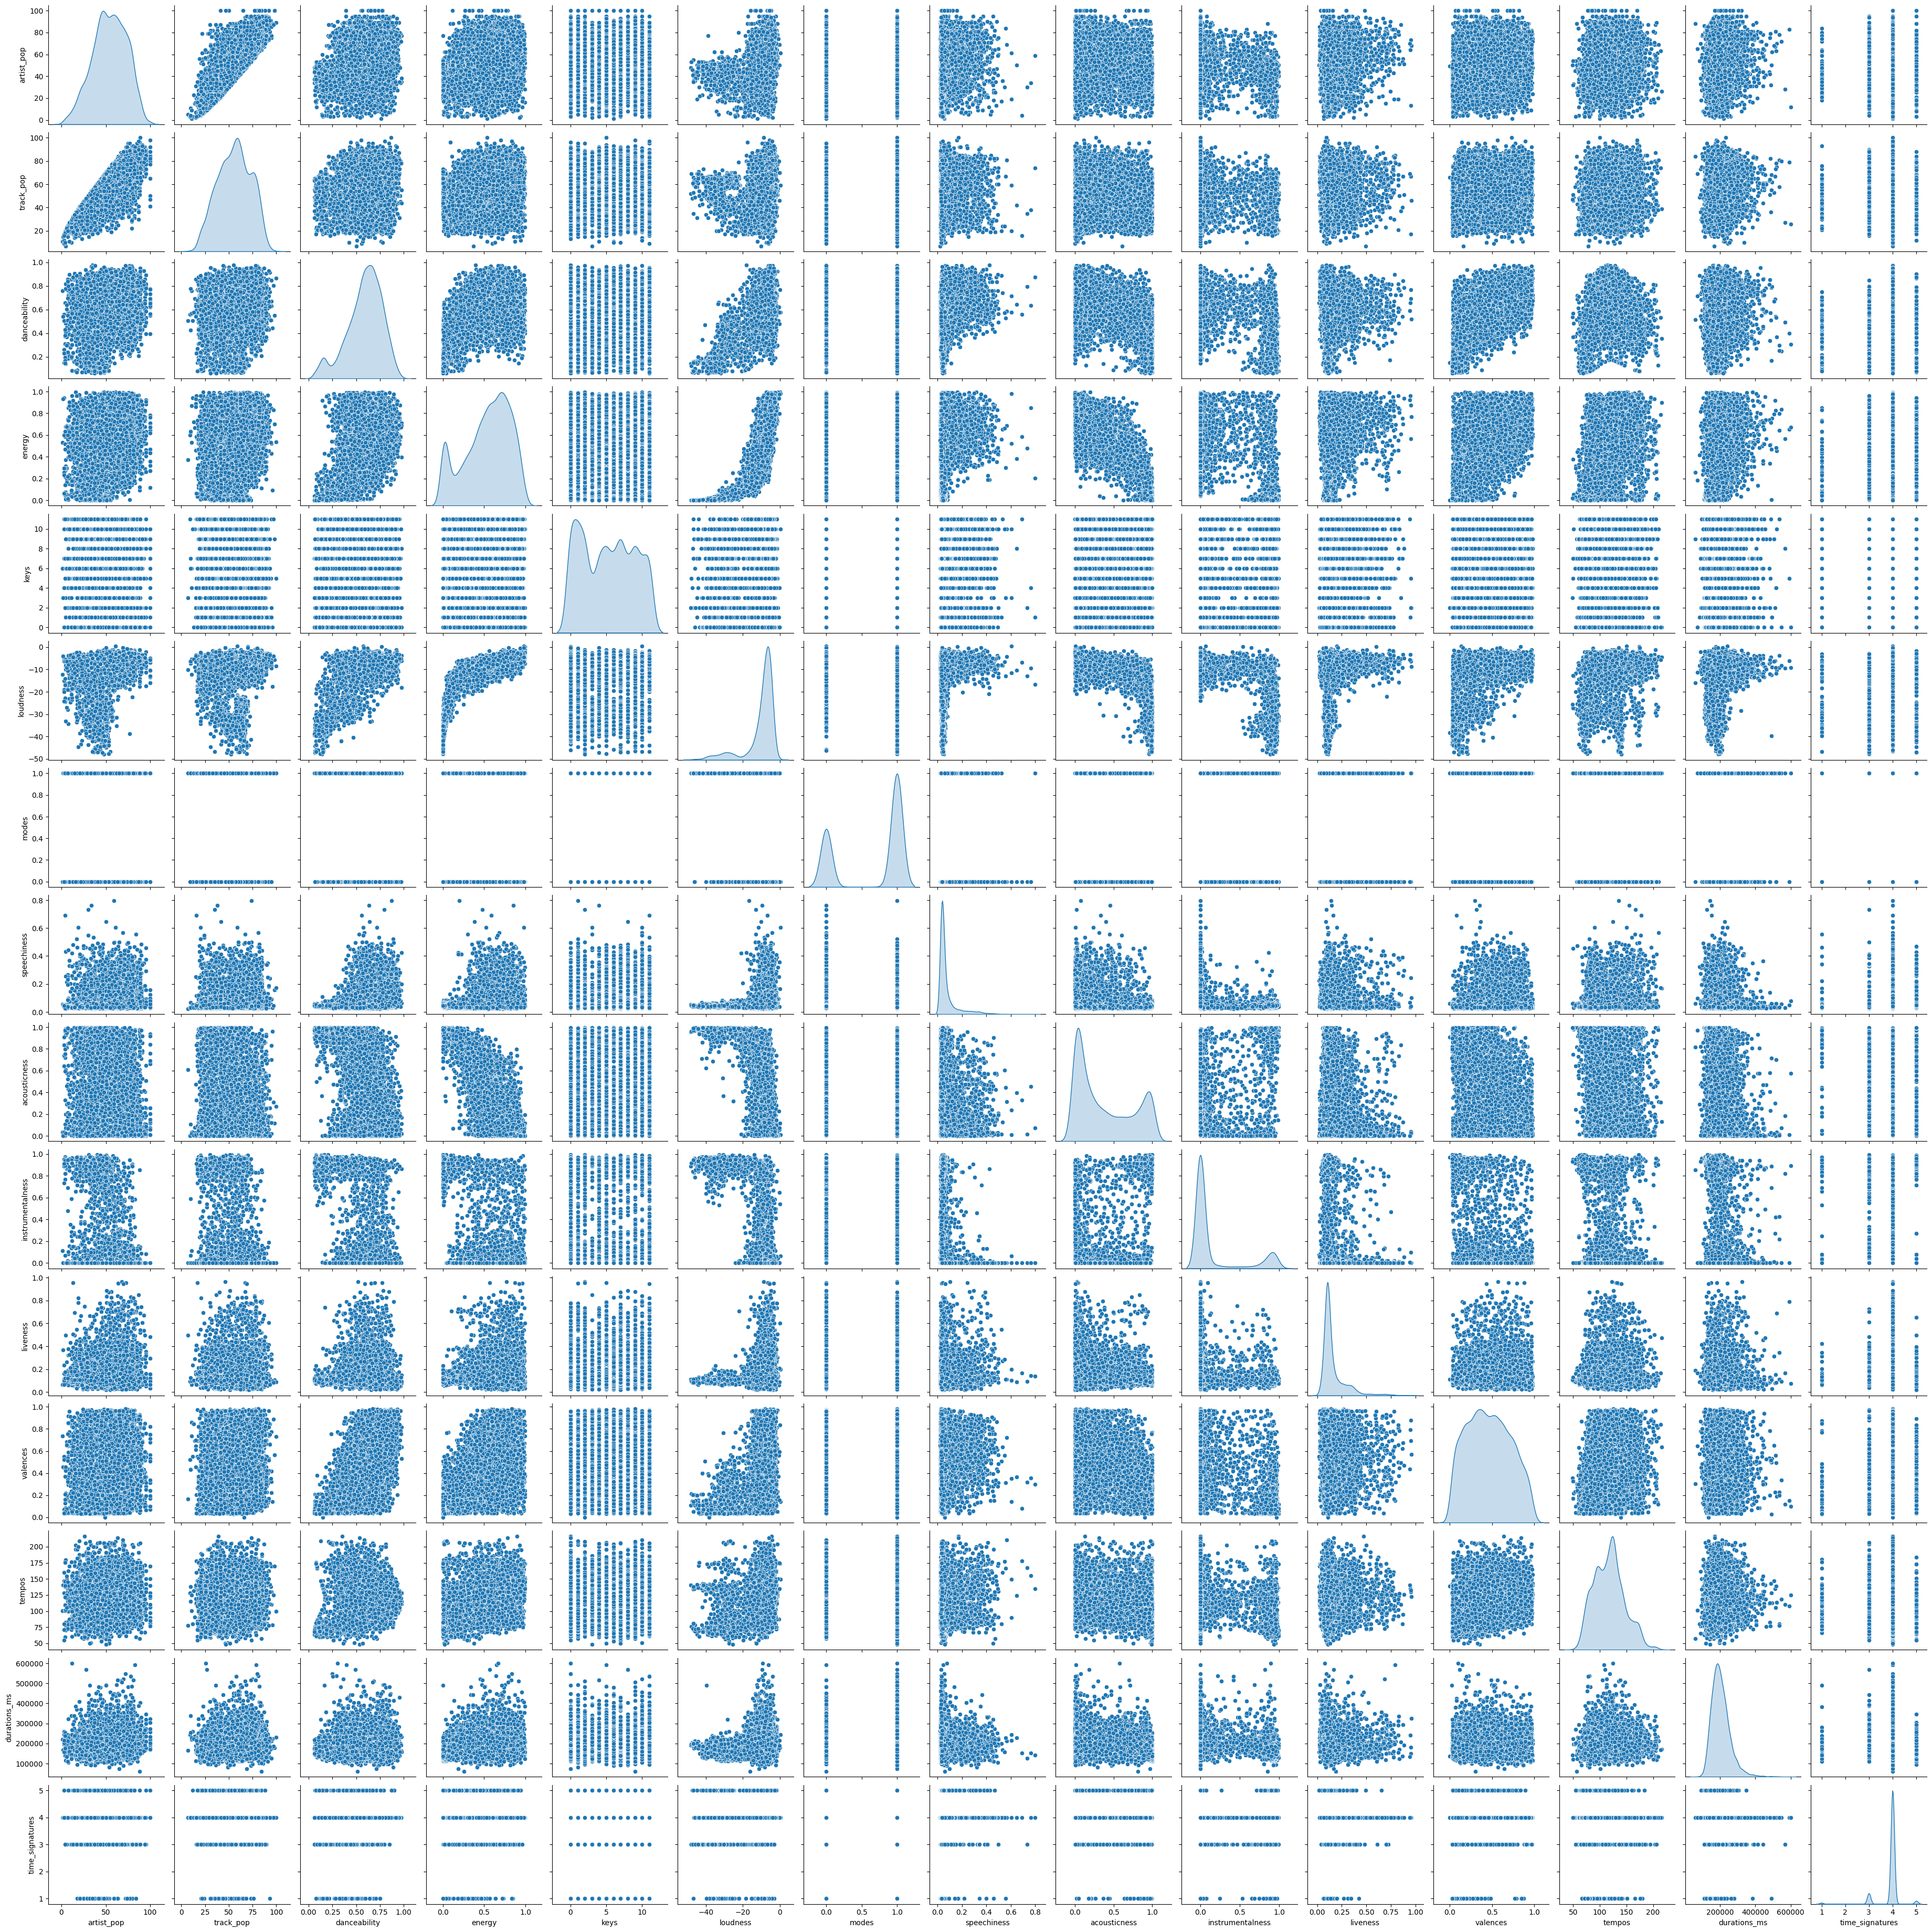

In [81]:
sns.pairplot(df, diag_kind='kde')
plt.show()

## Feature Creation

### One Hot Encoding

In [207]:
def ohe_prep(df, column):
    df_encoded = pd.get_dummies(df, columns=[column]) 
    return df_encoded

In [208]:
df_test = ohe_prep(df, 'modes')

In [209]:
df_test.columns

Index(['uris', 'names', 'artist_names', 'artist_uris', 'artist_pop',
       'artist_genres', 'albums', 'track_pop', 'danceability', 'energy',
       'keys', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valences', 'tempos', 'types', 'ids', 'track_hrefs',
       'analysis_urls', 'durations_ms', 'time_signatures', 'playlist_name',
       'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6',
       'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'modes_0', 'modes_1'],
      dtype='object')

### Normalize Popularity Values

In [210]:
scaler = MinMaxScaler()
df[['artist_pop', 'track_pop']] = scaler.fit_transform(df[['artist_pop', 'track_pop']])

### TFID Transformation

In [211]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1),min_df=0.0)
tfidf_matrix = tf.fit_transform(df['artist_genres'])

In [212]:
len(tf.vocabulary_)

668

In [213]:
tfidf_matrix.shape

(6588, 668)

In [214]:
tfidf_matrix[:4, :4]

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [215]:
genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names_out())

In [216]:
genre_df.columns = ['genre' + "|" + i for i in genre_df.columns]

In [217]:
genre_df.head()

genre|528hz  genre|5th  genre|abstract  genre|acid  genre|acoustic  \
0          0.0        0.0             0.0         0.0             0.0   
1          0.0        0.0             0.0         0.0             0.0   
2          0.0        0.0             0.0         0.0             0.0   
3          0.0        0.0             0.0         0.0             0.0   
4          0.0        0.0             0.0         0.0             0.0   

   genre|adelaide  genre|adult  genre|aesthetic  genre|african  \
0             0.0          0.0              0.0            0.0   
1             0.0          0.0              0.0            0.0   
2             0.0          0.0              0.0            0.0   
3             0.0          0.0              0.0            0.0   
4             0.0          0.0              0.0            0.0   

   genre|afrikaans  ...  genre|worship  genre|worth  genre|xhosa  genre|yacht  \
0              0.0  ...            0.0          0.0          0.0          0.0   
1              0.0  ...            0.0          0.0          0.0          0.0   
2              0.0  ...            0.0          0.0          0.0          0.0   
3              0.0  ...            0.0          0.0          0.0          0.0   
4              0.0  ...            0.0          0.0          0.0          0.0   

   genre|ye  genre|yogyakarta  genre|york  genre|youth  genre|zolo  \
0       0.0               0.0         0.0          0.0         0.0   
1       0.0               0.0         0.0          0.0         0.0   
2       0.0               0.0         0.0          0.0         0.0   
3       0.0               0.0         0.0          0.0         0.0   
4       0.0               0.0         0.0          0.0         0.0   

   genre|zouglou  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 668 columns]

In [218]:
genre_df.describe()

genre|528hz    genre|5th  genre|abstract   genre|acid  genre|acoustic  \
count  6588.000000  6588.000000     6588.000000  6588.000000     6588.000000   
mean      0.000152     0.000067        0.000414     0.000469        0.008828   
std       0.012320     0.005418        0.017124     0.015027        0.075014   
min       0.000000     0.000000        0.000000     0.000000        0.000000   
25%       0.000000     0.000000        0.000000     0.000000        0.000000   
50%       0.000000     0.000000        0.000000     0.000000        0.000000   
75%       0.000000     0.000000        0.000000     0.000000        0.000000   
max       1.000000     0.439726        0.760237     0.883921        0.843332   

       genre|adelaide  genre|adult  genre|aesthetic  genre|african  \
count     6588.000000  6588.000000      6588.000000    6588.000000   
mean         0.000133     0.000716         0.000208       0.004325   
std          0.010788     0.016954         0.012649       0.050730   
min          0.000000     0.000000         0.000000       0.000000   
25%          0.000000     0.000000         0.000000       0.000000   
50%          0.000000     0.000000         0.000000       0.000000   
75%          0.000000     0.000000         0.000000       0.000000   
max          0.875628     0.484480         0.925477       0.898676   

       genre|afrikaans  ...  genre|worship  genre|worth  genre|xhosa  \
count      6588.000000  ...    6588.000000  6588.000000  6588.000000   
mean          0.000322  ...       0.000650     0.000208     0.000252   
std           0.015726  ...       0.019217     0.011955     0.010311   
min           0.000000  ...       0.000000     0.000000     0.000000   
25%           0.000000  ...       0.000000     0.000000     0.000000   
50%           0.000000  ...       0.000000     0.000000     0.000000   
75%           0.000000  ...       0.000000     0.000000     0.000000   
max           1.000000  ...       0.740067     0.686181     0.499579   

       genre|yacht     genre|ye  genre|yogyakarta   genre|york  genre|youth  \
count  6588.000000  6588.000000       6588.000000  6588.000000  6588.000000   
mean      0.001874     0.000146          0.000066     0.000102     0.000158   
std       0.027932     0.011822          0.005326     0.008285     0.009086   
min       0.000000     0.000000          0.000000     0.000000     0.000000   
25%       0.000000     0.000000          0.000000     0.000000     0.000000   
50%       0.000000     0.000000          0.000000     0.000000     0.000000   
75%       0.000000     0.000000          0.000000     0.000000     0.000000   
max       0.908253     0.959567          0.432283     0.672449     0.553694   

        genre|zolo  genre|zouglou  
count  6588.000000    6588.000000  
mean      0.000285       0.000110  
std       0.010630       0.008896  
min       0.000000       0.000000  
25%       0.000000       0.000000  
50%       0.000000       0.000000  
75%       0.000000       0.000000  
max       0.546274       0.722041  

[8 rows x 668 columns]

In [219]:
genre_df.columns

Index(['genre|528hz', 'genre|5th', 'genre|abstract', 'genre|acid',
       'genre|acoustic', 'genre|adelaide', 'genre|adult', 'genre|aesthetic',
       'genre|african', 'genre|afrikaans',
       ...
       'genre|worship', 'genre|worth', 'genre|xhosa', 'genre|yacht',
       'genre|ye', 'genre|yogyakarta', 'genre|york', 'genre|youth',
       'genre|zolo', 'genre|zouglou'],
      dtype='object', length=668)

In [220]:
def tfidf_transformation(df):
    tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1),min_df=0.0)
    tfidf_matrix = tf.fit_transform(df['artist_genres'])
    genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names_out())
    genre_df.columns = ['genre' + "|" + i for i in genre_df.columns]

    df = df.drop(columns=['artist_genres'])

    df = pd.concat([df, genre_df], axis=1)
    df = df.fillna(0)
    return df

In [221]:
df = tfidf_transformation(df)

In [223]:
df.describe()

artist_pop    track_pop  danceability       energy         keys  \
count  6588.000000  6588.000000   6588.000000  6588.000000  6588.000000   
mean      0.538081     0.523614      0.588181     0.538318     5.213418   
std       0.191357     0.184428      0.181641     0.270268     3.594522   
min       0.000000     0.000000      0.060700     0.000155     0.000000   
25%       0.404040     0.387097      0.486750     0.361000     2.000000   
50%       0.545455     0.526882      0.612000     0.581000     5.000000   
75%       0.686869     0.666667      0.719000     0.751000     8.000000   
max       1.000000     1.000000      0.979000     0.996000    11.000000   

          loudness        modes  speechiness  acousticness  instrumentalness  \
count  6588.000000  6588.000000  6588.000000   6588.000000       6588.000000   
mean    -10.449874     0.661506     0.077472      0.379892          0.165573   
std       8.213359     0.473233     0.082415      0.355703          0.328043   
min     -48.069000     0.000000     0.022700      0.000002          0.000000   
25%     -11.069000     0.000000     0.035200      0.049300          0.000000   
50%      -7.688000     1.000000     0.045200      0.249000          0.000079   
75%      -5.693000     1.000000     0.074525      0.716000          0.045825   
max       0.381000     1.000000     0.798000      0.996000          0.993000   

       ...  genre|worship  genre|worth  genre|xhosa  genre|yacht     genre|ye  \
count  ...    6588.000000  6588.000000  6588.000000  6588.000000  6588.000000   
mean   ...       0.000650     0.000208     0.000252     0.001874     0.000146   
std    ...       0.019217     0.011955     0.010311     0.027932     0.011822   
min    ...       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...       0.000000     0.000000     0.000000     0.000000     0.000000   
50%    ...       0.000000     0.000000     0.000000     0.000000     0.000000   
75%    ...       0.000000     0.000000     0.000000     0.000000     0.000000   
max    ...       0.740067     0.686181     0.499579     0.908253     0.959567   

       genre|yogyakarta   genre|york  genre|youth   genre|zolo  genre|zouglou  
count       6588.000000  6588.000000  6588.000000  6588.000000    6588.000000  
mean           0.000066     0.000102     0.000158     0.000285       0.000110  
std            0.005326     0.008285     0.009086     0.010630       0.008896  
min            0.000000     0.000000     0.000000     0.000000       0.000000  
25%            0.000000     0.000000     0.000000     0.000000       0.000000  
50%            0.000000     0.000000     0.000000     0.000000       0.000000  
75%            0.000000     0.000000     0.000000     0.000000       0.000000  
max            0.432283     0.672449     0.553694     0.546274       0.722041  

[8 rows x 693 columns]

## Pipeline

In [225]:
def data_pipeline(df):
    # Select only the necessary columns
    df = select_columns(df)

    # Perfrom OHE
    df = ohe_prep(df, 'modes')
    df = ohe_prep(df, 'keys')

    # Normalize popularity values
    scaler = MinMaxScaler()
    df[['artist_pop', 'track_pop']] = scaler.fit_transform(df[['artist_pop', 'track_pop']])

    # Perform TFID vectorization on genres
    df = tfidf_transformation(df)

    return df

## Pipeline in Action

In [224]:
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [226]:
df = data_pipeline(df)

In [227]:
df.head()

artist_pop  track_pop  danceability  energy  loudness  \
5u5MpBnvJejW9dHPrfWEXZ    0.505051   0.677419         0.801   0.645    -6.930   
5DqrMSaG6KXa9PWlnnKJyb    0.555556   0.419355         0.744   0.632    -7.810   
2nGFzvICaeEWjIrBrL2RAx    0.626263   0.784946         0.739   0.511    -7.844   
1Xsxp1SEOxuMzjrFZhtw8u    0.606061   0.516129         0.674   0.810    -5.117   
3stnrhzN0lzZFskbaZ5sEw    0.434343   0.569892         0.734   0.668    -3.935   

                        speechiness  acousticness  instrumentalness  liveness  \
5u5MpBnvJejW9dHPrfWEXZ       0.0356        0.0460          0.000000    0.0357   
5DqrMSaG6KXa9PWlnnKJyb       0.0317        0.0556          0.000000    0.0973   
2nGFzvICaeEWjIrBrL2RAx       0.0362        0.1670          0.000001    0.1330   
1Xsxp1SEOxuMzjrFZhtw8u       0.0378        0.0923          0.000047    0.1100   
3stnrhzN0lzZFskbaZ5sEw       0.0349        0.0526          0.000000    0.0925   

                        valences  ...  genre|worship genre|worth genre|xhosa  \
5u5MpBnvJejW9dHPrfWEXZ     0.824  ...            0.0         0.0         0.0   
5DqrMSaG6KXa9PWlnnKJyb     0.542  ...            0.0         0.0         0.0   
2nGFzvICaeEWjIrBrL2RAx     0.542  ...            0.0         0.0         0.0   
1Xsxp1SEOxuMzjrFZhtw8u     0.391  ...            0.0         0.0         0.0   
3stnrhzN0lzZFskbaZ5sEw     0.651  ...            0.0         0.0         0.0   

                        genre|yacht  genre|ye genre|yogyakarta genre|york  \
5u5MpBnvJejW9dHPrfWEXZ          0.0       0.0              0.0        0.0   
5DqrMSaG6KXa9PWlnnKJyb          0.0       0.0              0.0        0.0   
2nGFzvICaeEWjIrBrL2RAx          0.0       0.0              0.0        0.0   
1Xsxp1SEOxuMzjrFZhtw8u          0.0       0.0              0.0        0.0   
3stnrhzN0lzZFskbaZ5sEw          0.0       0.0              0.0        0.0   

                       genre|youth genre|zolo genre|zouglou  
5u5MpBnvJejW9dHPrfWEXZ         0.0        0.0           0.0  
5DqrMSaG6KXa9PWlnnKJyb         0.0        0.0           0.0  
2nGFzvICaeEWjIrBrL2RAx         0.0        0.0           0.0  
1Xsxp1SEOxuMzjrFZhtw8u         0.0        0.0           0.0  
3stnrhzN0lzZFskbaZ5sEw         0.0        0.0           0.0  

[5 rows x 697 columns]

In [229]:
df.shape

(13176, 697)

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.show()

## Create Target Playlist Summary Vector